In [1]:
#데이터 전처리
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
#MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

#차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32' )/ 255

Y_train = tf.keras.utils.to_categorical(Y_class_train,10)
Y_test = tf.keras.utils.to_categorical(Y_class_test,10)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3) ,activation='relu') )
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
MODEL_DIR ='./model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30,
batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy : %.4f" % (model.evaluate(X_test,Y_test) [1] ))


Epoch 00001: val_loss improved from inf to 0.05813, saving model to ./model\01-0.0581.hdf5

Epoch 00002: val_loss improved from 0.05813 to 0.04233, saving model to ./model\02-0.0423.hdf5

Epoch 00003: val_loss improved from 0.04233 to 0.03561, saving model to ./model\03-0.0356.hdf5

Epoch 00004: val_loss improved from 0.03561 to 0.03217, saving model to ./model\04-0.0322.hdf5

Epoch 00005: val_loss improved from 0.03217 to 0.02730, saving model to ./model\05-0.0273.hdf5

Epoch 00006: val_loss did not improve from 0.02730

Epoch 00007: val_loss improved from 0.02730 to 0.02607, saving model to ./model\07-0.0261.hdf5

Epoch 00008: val_loss did not improve from 0.02607

Epoch 00009: val_loss did not improve from 0.02607

Epoch 00010: val_loss did not improve from 0.02607

Epoch 00011: val_loss did not improve from 0.02607

Epoch 00012: val_loss did not improve from 0.02607

Epoch 00013: val_loss did not improve from 0.02607

Epoch 00014: val_loss did not improve from 0.02607

Epoch 00015

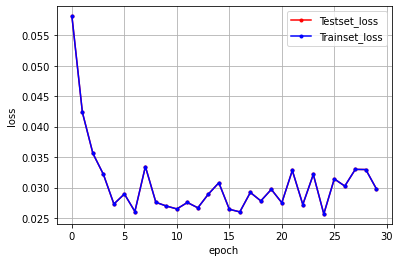

In [6]:
y_vloss = history.history['val_loss']

y_loss  = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_vloss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()